In [1]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.grid_2d_graph(5,5) 
pos = nx.spring_layout(G, iterations=100)

In [2]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd

In [3]:
model = AbstractModel()
model.N=Param(mutable=True)
model.i = RangeSet(1,model.N)
model.j = Set(initialize=model.i)
model.kolor=RangeSet(1,model.N)
model.L = Param(model.i,model.j, initialize=0,mutable=True)
model.X = Var(model.i,model.kolor, domain=Binary)
model.y = Var(within=NonNegativeReals)

def rule_C1(model,i,j,c):
    return model.L[i,j]*(model.X[i,c]+ model.X[j,c])<=1
model.C1 = Constraint(model.i, model.j, model.kolor, rule=rule_C1)

def rule_C2(model,i,c):
    return model.y>=c*model.X[i,c]
model.C2 = Constraint(model.i, model.kolor, rule=rule_C2)

def rule_C3(model,i):
    return sum(model.X[i,c] for c in model.kolor)==1
model.C3 = Constraint(model.i, rule=rule_C3)
model.OF=Objective(expr=model.y, sense=minimize)


In [4]:
opt = SolverFactory('glpk')
model.N=len(G.nodes)
#instance = model.create_instance('Ex36.dat')
instance = model.create_instance()


In [5]:
counter=1
edges=[]
coordinates=[]
nodes=[]
xvec=[]
yvec=[]
for nd in G.nodes:
    print(nd)
    nodes.append(counter)
    coordinates.append(nd)
    xvec.append(nd[0])
    yvec.append(nd[1])
    counter+=1
    
mygraph = {'nodes': nodes,
          'xy': coordinates,
           'x': xvec,
           'y': yvec}
df = pd.DataFrame(mygraph, columns = ['nodes', 'xy','x','y'])
    
for i in instance.i:
    for j in instance.j:
        instance.L[i,j]=0

for edg in G.edges:
    fn=edg[0]
    tn=edg[1]
    ind1=(df['x'] == fn[0]) & (df['y'] == fn[1])
    f=df.loc[ind1,'nodes']
    ind2=(df['x'] == tn[0]) & (df['y'] == tn[1])
    t=df.loc[ind2,'nodes']
    i=f.iloc[0]
    j=t.iloc[0]
    instance.L[i,j]=1
    instance.L[j,i]=1

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)


In [11]:
results = opt.solve(instance) 
for i in instance.i:
    for j in instance.j:
        if value(instance.L[i,j])>0:
            print((i,j),value(instance.L[i,j]))

(1, 2) 1
(1, 6) 1
(2, 1) 1
(2, 3) 1
(2, 7) 1
(3, 2) 1
(3, 4) 1
(3, 8) 1
(4, 3) 1
(4, 5) 1
(4, 9) 1
(5, 4) 1
(5, 10) 1
(6, 1) 1
(6, 7) 1
(6, 11) 1
(7, 2) 1
(7, 6) 1
(7, 8) 1
(7, 12) 1
(8, 3) 1
(8, 7) 1
(8, 9) 1
(8, 13) 1
(9, 4) 1
(9, 8) 1
(9, 10) 1
(9, 14) 1
(10, 5) 1
(10, 9) 1
(10, 15) 1
(11, 6) 1
(11, 12) 1
(11, 16) 1
(12, 7) 1
(12, 11) 1
(12, 13) 1
(12, 17) 1
(13, 8) 1
(13, 12) 1
(13, 14) 1
(13, 18) 1
(14, 9) 1
(14, 13) 1
(14, 15) 1
(14, 19) 1
(15, 10) 1
(15, 14) 1
(15, 20) 1
(16, 11) 1
(16, 17) 1
(16, 21) 1
(17, 12) 1
(17, 16) 1
(17, 18) 1
(17, 22) 1
(18, 13) 1
(18, 17) 1
(18, 19) 1
(18, 23) 1
(19, 14) 1
(19, 18) 1
(19, 20) 1
(19, 24) 1
(20, 15) 1
(20, 19) 1
(20, 25) 1
(21, 16) 1
(21, 22) 1
(22, 17) 1
(22, 21) 1
(22, 23) 1
(23, 18) 1
(23, 22) 1
(23, 24) 1
(24, 19) 1
(24, 23) 1
(24, 25) 1
(25, 20) 1
(25, 24) 1


In [7]:
print(value(instance.y))
for i in instance.i:
    for c in instance.kolor:
        if value(instance.X[i,c])>0:
            print((i,c),value(instance.X[i,c]))

2.0
(1, 1) 1.0
(2, 2) 1.0
(3, 1) 1.0
(4, 2) 1.0
(5, 1) 1.0
(6, 2) 1.0
(7, 1) 1.0
(8, 2) 1.0
(9, 1) 1.0
(10, 2) 1.0
(11, 1) 1.0
(12, 2) 1.0
(13, 1) 1.0
(14, 2) 1.0
(15, 1) 1.0
(16, 2) 1.0
(17, 1) 1.0
(18, 2) 1.0
(19, 1) 1.0
(20, 2) 1.0
(21, 1) 1.0
(22, 2) 1.0
(23, 1) 1.0
(24, 2) 1.0
(25, 1) 1.0


In [8]:
   
print ("The solver returned a status of:"+str(results.solver.status))
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     # something else is wrong
     print (str(results.solver))

The solver returned a status of:ok
this is feasible and optimal


In [9]:
#instance.C1.pprint()

C:\Users\aija\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


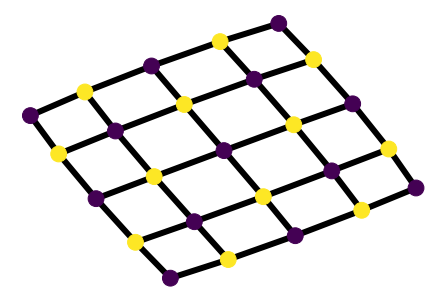

In [10]:
cvec=[]
for i in instance.i:
    for c in instance.kolor:
        if value(instance.X[i,c])>0:
            cvec.append(c)
l1=nx.draw(G, pos, node_size=250, node_color=cvec,with_labels=False, width=6)
plt.show()